## 8.2 ロジスティック回帰

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
import sklearn.cross_validation as cv
import sklearn.grid_search as gs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# タイタニック生存者データ
train = pd.read_csv('data/titanic_train.csv')
test = pd.read_csv('data/titanic_test.csv')

In [3]:
train[train.columns[[2,4,5,1]]].head()

,Pclass,Sex,Age,Survived
0,3,male,22,0
1,1,female,38,1
2,3,female,26,1
3,1,female,35,1
4,3,male,35,0


In [4]:
# 使用する列だけコピー
data = train[['Sex','Age','Pclass','Survived']].copy()
data['Sex'] = data['Sex'] == 'female'
# NaNを含む行を削除する
data = data.dropna()

In [5]:
# NumPyに変換
data_np = data.astype(np.int32).values
X = data_np[:,:-1]
y = data_np[:,-1]

In [6]:
female = X[:,0]==1
survived = y == 1
age = X[:,1]
bins_ = np.arange(0,81,5)
S = {'male':np.histogram(age[survived & ~female],bins=bins_)[0],
     'female':np.histogram(age[survived & female],bins=bins_)[0]}
D = {'male':np.histogram(age[~survived & ~female],bins=bins_)[0],
     'female':np.histogram(age[~survived & female],bins=bins_)[0]}

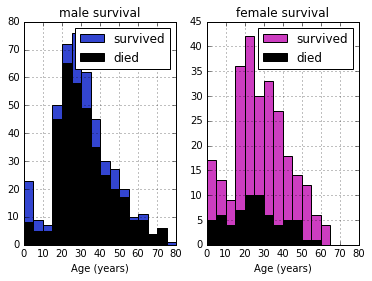

In [7]:
# ヒストグラムで可視化
bins = bins_[:-1]
for i,sex,color in zip((0,1),('male','female'),('#3345d0','#cc3dc0')):
    plt.subplot(121 + i)
    plt.bar(bins,S[sex],bottom=D[sex],color=color,width=5,label='survived')
    plt.bar(bins,D[sex],color='k',width=5,label='died')
    plt.xlim(0,80)
    plt.grid(None)
    plt.title(sex + " survival")
    plt.xlabel("Age (years)")
    plt.legend()

In [8]:
# 訓練用データとテスト用データの作成
(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.05)

In [9]:
logreg = lm.LinearRegression()

In [10]:
# テストデータで予測
logreg.fit(X_train,y_train)
y_predicted = logreg.predict(X_test)

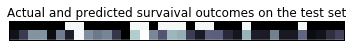

In [11]:
# 比較（可視化）
plt.imshow(np.vstack((y_test,y_predicted)),interpolation='none',cmap='bone')
plt.xticks([]);plt.yticks([])
plt.title(("Actual and predicted survaival " "outcomes on the test set"))

In [12]:
# 交差検証スコア
cv.cross_val_score(logreg, X, y)

array([ 0.31631155,  0.38433013,  0.41405386])

In [17]:
grid = gs.GridSearchCV(logreg,{'C':np.logspace(-5,5,50)})
#grid.fit(X,y)
#grid.

In [18]:
grid.fit_params

{}

In [19]:
#grid.estimator.